# For Whom and By Whom Is Glaciology

Jupyter notebook to make figures for manuscript "For Whom and By Whom is Glaciology?"

## Import packages

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Glacier county analysis

In [2]:
allcounties = pd.read_csv('./county_projections_official/SSP_asrc.csv') #left out 2280, 2231, 2261, 2232
glacier_geoid_list = [2130, 2220, 2100, 2282, 2122, 2020, 2170, 2185, 2290, 2070, 2240, 2068, 2150, 2164, 2013, 2016, 53073, 53057, 53061, 53007, 53033, 53037, 53053, 53041, 53077, 53059, 53031, 53009, 41005, 41017, 41019, 41027, 41031, 41039, 41043, 41047, 41063, 30009, 30029, 30035, 30047, 30053, 30063, 30067, 56013, 56019, 56029, 56035, 56039, 6019, 6027, 6051, 6093, 6107, 6109]

In [3]:
urban_thresh = 1e5

glacier = allcounties.loc[(allcounties['GEOID'].isin(glacier_geoid_list)) & (allcounties['YEAR'] == 2020)]
countypop = glacier.groupby('GEOID').sum()
urban_filter = (countypop['SSP3']>urban_thresh).tolist()
rural_filter = (countypop['SSP3']<urban_thresh).tolist()
glacier_geoid_list_urban = [i for indx,i in enumerate(sorted(list(set(glacier['GEOID'])))) if urban_filter[indx] == True]
glacier_geoid_list_rural = [i for indx,i in enumerate(sorted(list(set(glacier['GEOID'])))) if rural_filter[indx] == True]
glacier_urban = allcounties.loc[(allcounties['GEOID'].isin(glacier_geoid_list_urban)) & (allcounties['YEAR'] == 2020)]
glacier_rural = allcounties.loc[(allcounties['GEOID'].isin(glacier_geoid_list_rural)) & (allcounties['YEAR'] == 2020)]

In [4]:
glacier_white_pct = 100*glacier.loc[glacier['RACE'] == 1].sum()['SSP3']/glacier.sum()['SSP3']
glacier_black_pct = 100*glacier.loc[glacier['RACE'] == 2].sum()['SSP3']/glacier.sum()['SSP3']
glacier_hisp_pct = 100*glacier.loc[glacier['RACE'] == 3].sum()['SSP3']/glacier.sum()['SSP3']
glacier_other_pct = 100*glacier.loc[glacier['RACE'] == 4].sum()['SSP3']/glacier.sum()['SSP3']

In [5]:
glacier_rural_white_pct = 100*glacier_rural.loc[glacier_rural['RACE'] == 1].sum()['SSP3']/glacier_rural.sum()['SSP3']
glacier_rural_black_pct = 100*glacier_rural.loc[glacier_rural['RACE'] == 2].sum()['SSP3']/glacier_rural.sum()['SSP3']
glacier_rural_hisp_pct = 100*glacier_rural.loc[glacier_rural['RACE'] == 3].sum()['SSP3']/glacier_rural.sum()['SSP3']
glacier_rural_other_pct = 100*glacier_rural.loc[glacier_rural['RACE'] == 4].sum()['SSP3']/glacier_rural.sum()['SSP3']

## Gather All Data

In [6]:
# Create pandas Series
groups = pd.Series(["Non-Hispanic Black","Hispanic","Non-Hispanic Other","Multiple Races","Non-Hispanic White","Not specified","Population"])
pop = pd.Series(["","US","US Coastal Counties","AGU Cryosphere Section"])
us2022 = pd.Series([13.6,18.9,10.6,2.9,59.3,0,"US"])
coastal2020 = pd.Series([13.5,26.5,12.3,0,47.8,0,"US Coastal Counties"])
glacier2020 = pd.Series([glacier_black_pct,glacier_hisp_pct,glacier_other_pct,0,glacier_white_pct,0,"US Glacier Counties"])
glacier_rur2020 = pd.Series([glacier_rural_black_pct,glacier_rural_hisp_pct,glacier_rural_other_pct,0,glacier_rural_white_pct,0,"US Glacier Counties (Non-Urbanized)"])
agucryo2022  = pd.Series([0.77,2.36,14.06,2.17,67.03,13.63,"AGU Cryosphere Section"])
agucryo2022_realloc  = pd.Series([0.89,2.73,16.27,2.51,77.58,0,"AGU Cryosphere Section"])
aguallsec2022_realloc  = pd.Series([2.36,5.17,22.56,2.75,67.16,0,"AGU All Sections"])

# Combine series.
demos=pd.concat([us2022,coastal2020,glacier2020,glacier_rur2020,aguallsec2022_realloc, agucryo2022_realloc],axis=1)

#demos.columns = ['', 'US Coastal Counties', 'AGU Cryosphere Section']

#df=pd.concat([groups,us2020,coastal2020,agu2021,agucryo2022],axis=1)
demos=demos.T
demos.columns = ['Non-Hispanic Black','Hispanic','Non-Hispanic Other','Multiple Races','Non-Hispanic White','Not specified','Population']
sumdemos = demos
sumdemos[['Non-Hispanic Black','Hispanic','Non-Hispanic Other','Multiple Races','Non-Hispanic White','Not specified']] = demos[['Non-Hispanic Black','Hispanic','Non-Hispanic Other','Multiple Races','Non-Hispanic White','Not specified']].cumsum(axis=1)
demos

,Non-Hispanic Black,Hispanic,Non-Hispanic Other,Multiple Races,Non-Hispanic White,Not specified,Population
0,13.6,32.5,43.1,46.0,105.3,105.3,US
1,13.5,40.0,52.3,52.3,100.1,100.1,US Coastal Counties
2,4.568552,24.134773,36.644802,36.644802,100.0,100.0,US Glacier Counties
3,1.437881,13.174793,24.551616,24.551616,100.0,100.0,US Glacier Counties (Non-Urbanized)
4,2.36,7.53,30.09,32.84,100.0,100.0,AGU All Sections
5,0.89,3.62,19.89,22.4,99.98,99.98,AGU Cryosphere Section


## AGU Demo plot

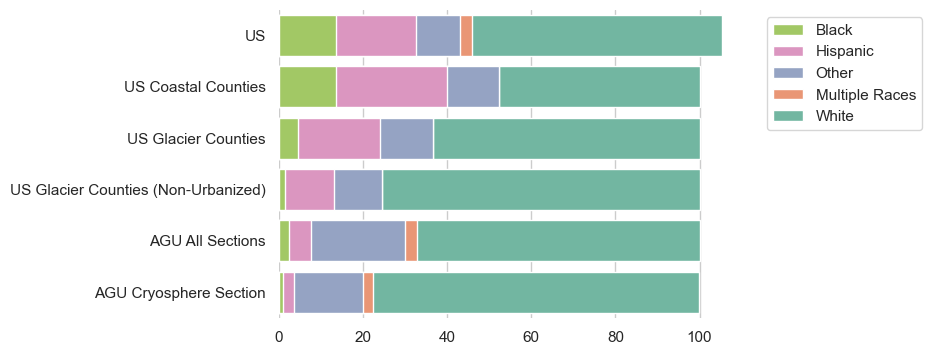

In [7]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 4))

#palette = iter(sns.husl_palette(len(coastal2020)))
palette = iter(sns.color_palette("Set2"))

bar5 = sns.barplot(x="Non-Hispanic White", y="Population", data=sumdemos,
            label="White", color=next(palette))

bar4 = sns.barplot(x="Multiple Races", y="Population", data=sumdemos,
            label="Multiple Races", color=next(palette))

bar3 = sns.barplot(x="Non-Hispanic Other", y="Population", data=sumdemos,
            label="Other", color=next(palette))

bar2 = sns.barplot(x="Hispanic", y="Population", data=sumdemos,
            label="Hispanic", color=next(palette))

bar1 = sns.barplot(x="Non-Hispanic Black", y="Population", data=sumdemos,
            label="Black", color=next(palette))

#ax.legend(ncol=1, loc="upper right", bbox_to_anchor=(1.4, 1), frameon=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right',ncol=1,bbox_to_anchor=(1.4, 1), frameon=True)
ax.set(xlabel=None)
ax.set(ylabel=None)
#ax.set(xlim=(0, 24), ylabel="",xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
sns.set_style("whitegrid", {'grid.color': 'gray'})
plt.savefig('BWFW_demos_v2.png', format="png",bbox_inches='tight')

## Publication chloropleth

In [22]:
import geopandas as gpd
import pandas as pd
#much help from https://geopandas.org/en/v0.9.0/docs/user_guide/mapping.html

In [23]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) #download world map data

/var/folders/_f/n4gkyxq96qg_qlxhm9s9t78c00xmln/T/ipykernel_19919/3293473353.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) #download world map data


In [24]:
pubs = pd.read_csv("Scopus-10-Analyze-Country-20240105.csv",skiprows=7)
pubs = pubs.rename(columns={"COUNTRY/TERRITORY":"name","Unnamed: 1": "Publications"})
pubs

,name,Publications
0,United States of America,1121
1,United Kingdom,641
2,Germany,328
3,Canada,246
4,Netherlands,241
...,...,...
107,Sri Lanka,1
108,Svalbard and Jan Mayen,1
109,Thailand,1
110,Ukraine,1


In [25]:
world_pubs = world.merge(pubs, on='name', how='left')
world_pubs['Publications'] = world_pubs['Publications'].fillna(0)
world_pubs

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Publications
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",3.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",246.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1121.0
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",1.0
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.0
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.0
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",3.0


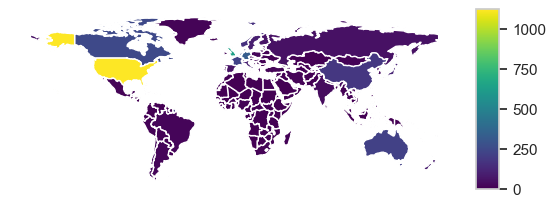

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world_pubs.plot(column="Publications", ax=ax, cmap='viridis', legend=True, cax=cax);
ax.grid(False)
ax.axis('off')
plt.savefig('BWFW_pubmap_v1.png', format="png",bbox_inches='tight')